In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-dataset/train_data.csv
/kaggle/input/twitter-dataset/test_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/twitter-dataset/train_data.csv',
                    delimiter=';', on_bad_lines='skip')
test = pd.read_csv('/kaggle/input/twitter-dataset/test_data.csv',
                   delimiter=';', on_bad_lines='skip')

In [4]:
print('train data info:')
print(train.info())

print('test data info:')
print(test.info())

train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
None
test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [5]:
print('train missing values:')
print(train.isna().mean())
print()
print('test missing values:')
print(test.isna().mean())

train missing values:
text     0.0
label    0.0
dtype: float64

test missing values:
IDText    0.0
Text      0.0
dtype: float64


# Exploratory Data Analysis

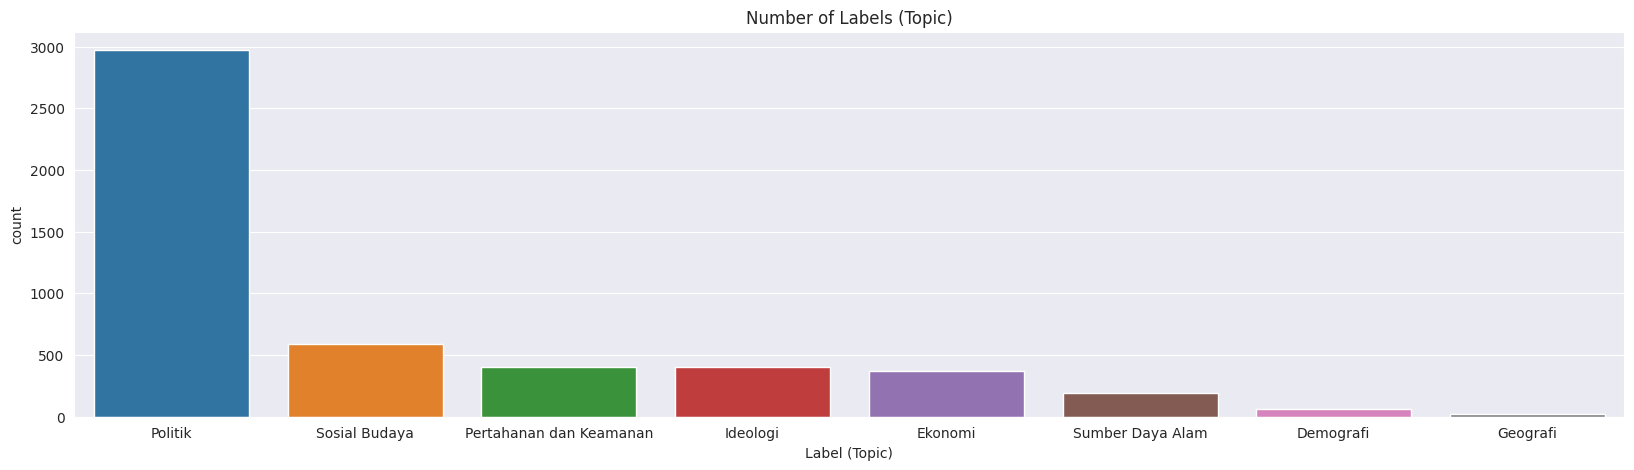

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

fig = plt.figure(figsize=(20,5))
sns.countplot(data=train, x='label',
              order = train['label'].value_counts().index)
# plt.xticks(rotation=45)

plt.title('Number of Labels (Topic)')
plt.xlabel('Label (Topic)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


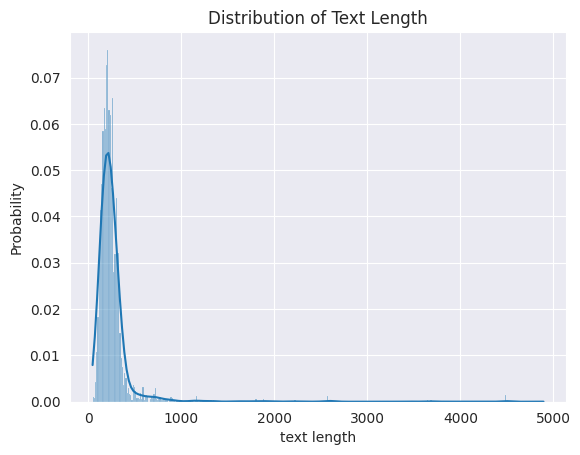

In [7]:
text_length = train['text'].apply(lambda x: len(x))
sns.histplot(text_length, kde=True, stat='probability')
plt.xlabel('text length')
plt.title('Distribution of Text Length')
plt.show()

# Text Preprocessing

TODO:
 - [ ] Lemmatization: Turning active words into its original roots.
 - [x] Lowercased: Lowercased all the characters.
 - [x] Removing Special Characters.
 - [x] Tokenization: Turning strings into a list of integers (need to think what tokenization to use).

In [8]:
import re
from collections import Counter
from nltk.corpus import stopwords

In [9]:
print(train['text'].values)

['Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto'
 'RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2]'
 '@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih'
 ...
 'imo both are irrational but yg satu jauh lebih irrational tbh. but nevertheless dua duanya mesti diluruskan dan baik anies dan ahok KUDU TERLIBAT LANGSUNG untuk validasi trauma mereka. dengan empati lho ya. gitu ae sih.'
 '@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= look at that pak ganjar, anda sdh berkecimpung di lgislatif, eksekutif bhkan capres saja m

In [10]:
stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))
def preprocess_tweet(tweet):
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove user mentions (updated line)
    tweet = re.sub(r'\B@\w+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove special characters and punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    # Removing stop words for indonesia
    tweet = " ".join([w for w in tweet.split() if w not in stop_words_id])
    # Removing stop words for english
    tweet = " ".join([w for w in tweet.split() if w not in stop_words_en])
    
    # Remove 'rt' words
    if "rt" in  tweet.split():
        tweet_split = tweet.split()
        idx = tweet_split.index('rt')
        tweet_split.pop(idx)
        tweet = " ".join(tweet_split)
    
    return tweet

In [11]:
text = train['text'].iloc[-2]
print(text)
print(preprocess_tweet(text))

@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= look at that pak ganjar, anda sdh berkecimpung di lgislatif, eksekutif bhkan capres saja mamatGS brani mngmcam, ancaman itu nyata pak ganjar, nyalakan tanda bahaya utk OPM (operasi Persenjataan Mamat)
look ganjar sdh berkecimpung lgislatif eksekutif bhkan capres mamatgs brani mngmcam ancaman nyata ganjar nyalakan tanda bahaya utk opm operasi persenjataan mamat


In [12]:
test_text = 'rt babi'
test_text_split = test_text.split()
idx = test_text_split.index('rt')
test_text_split.pop(idx)
test_text_split

['babi']

In [17]:
train['preprocess_text'] = train['text'].apply(lambda x: preprocess_tweet(x))
test['preprocess_text'] = test['Text'].apply(lambda x: preprocess_tweet(x))

In [18]:
corpus = [word for text in train['preprocess_text'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()

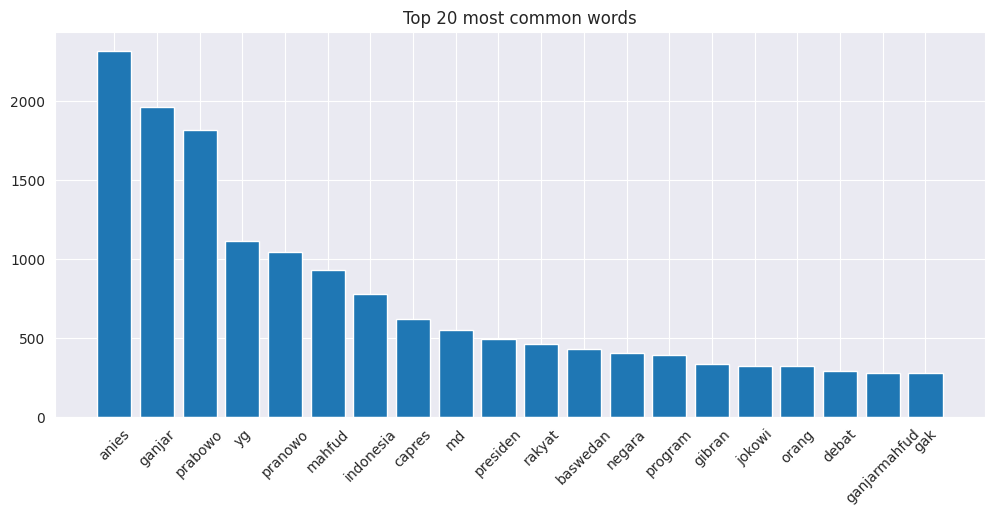

In [19]:
keys = []
values = []

for key, val in sorted_words[:20]:
    keys.append(key)
    values.append(val)

plt.figure(figsize=(12,5))
plt.bar(keys,values)
plt.title("Top 20 most common words")
plt.xticks(rotation=45)
plt.show()

In [20]:
dict_label = {l:i for i,l in enumerate(train['label'].unique())}
train['label'] = train['label'].apply(lambda x: dict_label[x])
len(dict_label)

8

In [21]:
from transformers import AutoTokenizer, AutoModel, BertTokenizer
# word level tokenizer
# stoi = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
# tweet_stoi = []
# for text in train['preprocess_text']:
#     r = [stoi[w] for w in text.split()]
#     tweet_stoi.append(r)


# indoBERT-base-uncased tokenizer
seq_length = 25
# tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased", model_max_length=seq_length)
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1", model_max_length=seq_length)
features = np.zeros((len(train.preprocess_text), seq_length), dtype=int)
for i,text in enumerate(train['preprocess_text']):
    # print(text)
    r = tokenizer.encode(text, padding='max_length', truncation='longest_first')
    features[i] = r

# train['tweet_stoi'] = tweet_stoi
# print(f'example : {train.iloc[0].tweet_stoi}')

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

# Create Training and Validation Set

In [22]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch

X_train, X_val, y_train, y_val = train_test_split(features, train['label'].to_numpy(),test_size=0.2, random_state=0)

# tensor dataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

# data loader
batch_size = 32
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)

In [24]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print(f'Sample input size: {sample_x.size()}') # BATCH_SIZE, SEQ_LENGTH
print(f'Sample input: {sample_x[0, :]}')
print(f'Sample output: {sample_y}')

Sample input size: torch.Size([32, 25])
Sample input: tensor([    2, 17630,  2458,  9434,  9162, 19044,  3823, 19145,  8874,  1829,
         4555,  7719, 24757,  1552,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0])
Sample output: tensor([3, 3, 1, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 4, 6, 1, 1, 1,
        1, 6, 3, 1, 0, 6, 1, 4])


# Model Architecture

In [25]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math
from sklearn.metrics import f1_score

In [26]:
# hyperparameters
embedding_dim = 512
vocab_size = len(tokenizer) + 1
num_heads = 8
n_layer = 8
block_size = seq_length
output_size = len(dict_label) # 8
device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 6e-5

In [27]:
emb = nn.Embedding(vocab_size, embedding_dim)
print(emb(sample_x).size())

torch.Size([32, 25, 512])


In [32]:
class Head(nn.Module):
    def __init__(self, head_size, dropout:float = 0.2):
        super().__init__()
        self.key = nn.Linear(embedding_dim, head_size, bias=False)
        self.query = nn.Linear(embedding_dim, head_size, bias=False)
        self.value = nn.Linear(embedding_dim, head_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
    
    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)
        q = self.key(x)
        wei = (q @ k.transpose(2,1)) / math.sqrt(C)
        
        # applying masked
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) 
        wei  = F.softmax(wei, dim=-1) # apply softmax
        
        # final result
        v = self.value(x)
        wei = self.dropout(wei)
        out = wei @ v
        return out

class FeedForward(nn.Module):
    def __init__(self, embedding_dim,dropout:float = 0.2):
        super().__init__()
        self.fc1 = nn.Linear(embedding_dim, 4 * embedding_dim)
        self.fc2 = nn.Linear(4 * embedding_dim, embedding_dim)   
        self.dropout = nn.Dropout(dropout)
        self.gelu = nn.GELU(approximate='tanh')
        
    def forward(self, x):
        return self.dropout(self.fc2(self.gelu(self.fc1(x))))   

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
    
    def forward(self, x):
        return torch.cat([h(x) for h in self.heads], dim=-1)


class Blocks(nn.Module):
    def __init__(self, num_heads, embedding_dim):
        super().__init__()
        head_size = embedding_dim // num_heads
        self.sa = MultiHeadAttention(num_heads, head_size) # self-attention network
        self.ffwd = FeedForward(embedding_dim) # feed forward network
        self.ln1 = nn.LayerNorm(embedding_dim)
        self.ln2 = nn.LayerNorm(embedding_dim)
    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class NN(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.we = nn.Embedding(vocab_size, embedding_dim)
        self.wpe = nn.Embedding(vocab_size, embedding_dim)
        self.blocks = nn.Sequential(*[Blocks(num_heads, embedding_dim) for _ in range(n_layer)])
        self.lm_head = nn.Linear(embedding_dim, output_size, bias=False)
        self.ln_final = nn.LayerNorm(embedding_dim)
#         self.lm_final = nn.Linear(vocab_size, output_size, bias=False)
        self.output = nn.LogSoftmax(dim=-1)
        
#         # weight tying/sharing scheme
#         self.we.weight = self.lm_head.weight
        
#         # init params
#         self.apply(self._init_weights)
        
#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             torch.nn.init.normal_(module.weight, mean=0, std=0.02)
#             if module.bias is not None:
#                 torch.nn.init.zeros_(module.bias)
#         elif isinstance(module, nn.Embedding):
#             torch.nn.init.normal_(module.weight, mean=0, std=0.02)
        
    def forward(self, x):
        B,T = x.shape
        token_emb = self.we(x)
        pos_token_emb = self.wpe(torch.arange(T))
        x = token_emb + pos_token_emb
        x = self.blocks(x)
        x = self.lm_head(self.ln_final(x))
#         x = self.lm_final(x)
        
        # get the last batch of labels
        x = x[:, -1, :]
        logits = self.output(x)
        return logits

## Training Loop

In [29]:
def get_score(pred, true):
    top_n, top_i = pred.topk(1)
    return f1_score(true.reshape(-1), top_i.reshape(-1), average='micro')

max_lr = 6e-4
min_lr = max_lr * 0.1
warmup_steps = 2
max_steps = 5
def get_lr(it):
    # linear warmup 
    if it < warmup_steps:
        return max_lr * (it + 1) / warmup_steps
    
    if it > max_steps:
        return min_lr
    
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi + decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)

In [43]:
model = NN(vocab_size, embedding_dim)
m = model.to(device)
learning_rate=3e-5
optimizer = torch.optim.AdamW(m.parameters(), lr=learning_rate,
                              betas=(0.9, 0.95), eps=1e-8)

In [44]:
%%time
train_epoch = []
train_score_epoch = []
val_epoch = []
val_score_epoch = []
for epoch in range(10):
    m.train()
    train_loss = []
    train_score = []
    val_loss = []
    val_score = []
    
    # updating learning rate
#     lr = get_lr(epoch)
#     for param_group in optimizer.param_groups:
#         param_group['lr'] = lr
    
    for i , (inputs,labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = m(inputs)
        loss = F.cross_entropy(outputs, labels)
        train_loss.append(loss.item())
        train_score.append(get_score(outputs,labels))
        loss.backward() 
        norm = torch.nn.utils.clip_grad_norm_(m.parameters(), 1.0) # gradient clipping
        optimizer.step()
    
    with torch.no_grad():
        m.eval()
        for i, (inputs,labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # forward pass
            outputs = m(inputs)
            loss_v = F.cross_entropy(outputs, labels)
            val_loss.append(loss_v.item())
            val_score.append(get_score(outputs, labels))
    
    train_epoch.append(np.mean(train_loss))
    train_score_epoch.append(np.mean(train_score))
    val_epoch.append(np.mean(val_loss))
    val_score_epoch.append(np.mean(val_score))
    print(f'EPOCH {(epoch+1)}')
    print(f'(TRAIN) loss,score : {(np.mean(train_loss), np.mean(train_score))} | (VAL) loss,score : {(np.mean(val_loss), np.mean(val_score))}')
#     print(f'lr : {lr}')
    print()
    # print(f'epoch {(epoch+1)}: train loss : {np.mean(train_loss)}, val loss : {np.mean(val_loss)}')

EPOCH 1
(TRAIN) loss,score : (1.3441009960174561, 0.59075) | (VAL) loss,score : (1.2680925000458956, 0.591796875)

EPOCH 2
(TRAIN) loss,score : (1.1969113917350769, 0.62575) | (VAL) loss,score : (1.1333214025944471, 0.6376953125)

EPOCH 3
(TRAIN) loss,score : (1.0445665168762206, 0.674) | (VAL) loss,score : (1.0733433794230223, 0.671875)

EPOCH 4
(TRAIN) loss,score : (0.9311283009052277, 0.70175) | (VAL) loss,score : (1.0666865147650242, 0.6650390625)

EPOCH 5
(TRAIN) loss,score : (0.8523417646884919, 0.72725) | (VAL) loss,score : (1.046913743019104, 0.69921875)

EPOCH 6
(TRAIN) loss,score : (0.81975572681427, 0.73725) | (VAL) loss,score : (1.0596392527222633, 0.7109375)

EPOCH 7
(TRAIN) loss,score : (0.7339830827713013, 0.76275) | (VAL) loss,score : (1.2060297224670649, 0.7109375)

EPOCH 8
(TRAIN) loss,score : (0.6943767083883285, 0.77625) | (VAL) loss,score : (1.1282331636175513, 0.7177734375)

EPOCH 9
(TRAIN) loss,score : (0.6374599311351776, 0.79525) | (VAL) loss,score : (1.1082948